In [1]:
import sys
import os
import glob
import pickle
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<4):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    print("path_pipest not found. Instead: {}".format(path_pipest))
    raise ValueError("path_pipest not found.")
path_paper = os.path.dirname(path_pipest)+'/paper'
path_models=path_pipest+'/models'    
path_sdhawkes=path_pipest+'/sdhawkes'
path_modelling = path_sdhawkes+'/modelling'
path_resources = path_sdhawkes+'/resources'
path_impact=path_pipest+'/impact'
path_lobster=path_pipest+'/lobster'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_tests = path_pipest+'/tests'
path_saved_tests = path_tests+'/saved_tests'
path_perfmeas=path_tests+'/performance_measurements'
sys.path.append(path_modelling)
sys.path.append(path_resources)
sys.path.append(path_perfmeas)
import numpy as np
import pandas
import matplotlib.pyplot as plt
import computation
import plot_tools

openmp.omp_get_max_threads(): 4


In [2]:
path_figures=path_paper+'/tex/figures/'
print(path_figures)

/home/claudio/pipest/paper/tex/figures/


In [3]:
symbol="INTC"
date="2019-01-23"
time_window="37800-41400"

In [ ]:
# with open(path_impact+"/models/{}/{}_sdhawkes_{}_{}"
#               .format(symbol, symbol, date, time_window, symbol, date, time_window), 'rb') as source:
#     model=pickle.load(source)

In [4]:
try:
    with open(path_impact+"/models/{}/{}_{}_{}/{}_sdhawkes_{}_{}_onesided_thesis"
              .format(symbol, symbol, date, time_window, symbol, date, time_window), 'rb') as source:
        model=pickle.load(source)
except FileNotFoundError:
    with open(path_impact+"/models/{}/{}_sdhawkes_{}_{}"
              .format(symbol, symbol, date, time_window, symbol, date, time_window), 'rb') as source:
        model=pickle.load(source)

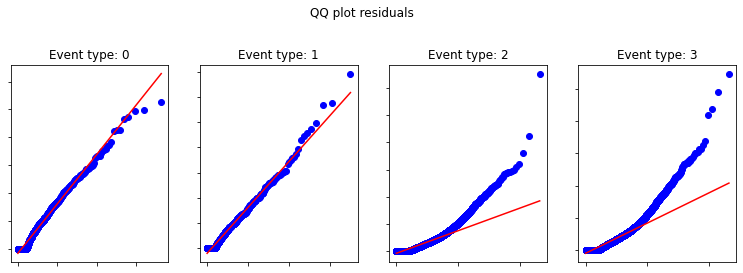

In [5]:
model.goodness_of_fit.qq_plot_residuals()

In [6]:
print(model.__dict__.keys())

dict_keys(['path_sdhawkes', 'path_pipest', 'path_models', 'name_of_model', 'datetime_of_initialisation', 'events_labels', 'states_labels', 'state_enc', 'number_of_states', 'number_of_event_types', 'n_levels', 'volume_enc', 'transition_probabilities', 'base_rates', 'impact_coefficients', 'decay_coefficients', 'impact_decay_ratios', 'dirichlet_param', 'hawkes_kernel', 'data', 'mle_estim', 'inflationary_pressure', 'deflationary_pressure', 'calibration', 'uncertainty_quantification', 'goodness_of_fit', 'reconstructed_empirical_price'])


In [ ]:
print(model.archive)

In [ ]:
# model.set_transition_probabilities(model.transition_probabilities)

In [ ]:
for idx in model.archive:
    try:
        print(model.archive[idx]['liquidator'].termination_time)
        print(idx)
    except:
        pass

In [ ]:
for idx in model.archive:
    try:
        model.liquidator=model.archive[idx]['liquidator']
        print(idx)
        model.liquidator.print_info()
        print('\n')
    except:
        pass

In [ ]:
idx='{}_sdhawkes_{}_{}_onesided_thesis_1s10'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+1.0,
                             ticksize=model.data.ticksize)
model.archive[idx]['liquidator'].impact.df_impact_profile.sort_values(by='time', inplace=True, ignore_index=True)

In [ ]:
print(model.archive[idx]['liquidator'].impact.__dict__.keys())

In [ ]:
print(model.archive[idx]['liquidator'].impact.sdhawkes.__dict__.keys())

In [ ]:
model.archive[idx]['liquidator'].impact.df_impact_profile.sort_values(by='time', inplace=True, ignore_index=True)

In [ ]:
time_start = 0.0
time_end = 400.0
liq = model.archive[idx]['liquidator']
plot_tools.plot_impact_profile(
    liq.impact.sdhawkes.times,
    liq.impact.sdhawkes.events,
    model.simulated_price,
    liq.inventory_trajectory,
    model.simulated_intensities,
    liq.impact.df_impact_profile.values,
    time_start, time_end,
    save_fig=False
)
    

In [ ]:
model.liquidator.print_info()
print("number of liquidator's interventions: {}".format(np.sum(model.simulated_events==0)))
print("max bacry-muzy impact: {}".format((model.liquidator.impact.df_impact_profile.iloc[:,1].max())))


In [ ]:
model.plot_price_trajectories(t0=-10.0, t1=500.0, save_fig=False, path=path_figures, name='onesided_test_20201106')
# model.plot_impact_profile(time_start=-20, time_end=model.liquidator.termination_time+50.0,
#                              save_fig=False, path=path_figures, name='apfb_bm')

In [ ]:
idx='{}_sdhawkes_{}_{}_bm1'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+1.0,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=1100.0)
model.plot_bm_impact_profile(time_start=-10.0, time_end=1100.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm2'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=500.0)
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm3'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+1.0,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()

In [ ]:
model.plot_price_trajectories(t0=-10.0, t1=300.0)
model.plot_bm_impact_profile(time_start=-10.0, time_end=300.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm4'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=500.0)
model.plot_bm_impact_profile()

model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=400.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm5'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)
model.liquidator.print_info()
model.plot_price_trajectories(t0=-50.0, t1=500.0)
model.plot_bm_impact_profile()


In [ ]:
idx='{}_sdhawkes_{}_{}_bm6'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=500.0)
model.plot_bm_impact_profile()

model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=400.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm7'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

model.liquidator.print_info()

model.plot_price_trajectories(t0=-10.0, t1=1000.0)

model.plot_bm_impact_profile()

model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=2000.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm8'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+2,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=1000.0)
model.plot_bm_impact_profile()
model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=1000.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm9'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+2,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=1100.0)
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm10'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+2,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=1000.0)
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm11'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+2,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=1000.0)
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm12'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+2,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=1000.0)
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm13'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+2,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=1000.0)
model.plot_bm_impact_profile()

In [ ]:
def sigma_E(e):
    return 2*(e//2)+1-e%2
def sigma_S(x):
    return model.number_of_states -1  - x

In [ ]:
# y=9

# for e in [1,3]:
#     print("\ne={}, sigma_E(e)={}".format(e,sigma_E(e)))
#     for x in model.state_enc.inflationary_states:
#         print(" x={}, sigma_S(x)={}".format(x, sigma_S(x)))
#         print("  phi[y,e,x]={}; phi[y,sigma_E(e),sigma_S(x)]={}".format(phi[y,e,x],phi[y,sigma_E(e),sigma_S(x)]))
#         print("  delta = {}".format(phi[y,e,x]-phi[y,sigma_E(e),sigma_S(x)]))


# overall_direction = (sum([np.sum(phi[y,:,x]) for x in model.state_enc.inflationary_states]) 
# - sum([np.sum(phi[y,:,x]) for x in model.state_enc.deflationary_states]) )
# print(overall_direction)

In [ ]:
#With the market
